In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv("data/retail_sales_data.csv")

df.head()

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
0,2023-01-01,1001,Product A,Electronics,500,350,20,100
1,2023-01-02,1002,Product B,Electronics,600,400,15,80
2,2023-01-03,1003,Product C,Clothing,50,30,50,200
3,2023-01-04,1004,Product D,Clothing,40,25,80,120
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150


In [188]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [189]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name(locale='English')

df.head()

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count,Month
0,2023-01-01,1001,Product A,Electronics,500,350,20,100,January
1,2023-01-02,1002,Product B,Electronics,600,400,15,80,January
2,2023-01-03,1003,Product C,Clothing,50,30,50,200,January
3,2023-01-04,1004,Product D,Clothing,40,25,80,120,January
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150,January


In [190]:
jandf = df.loc[df['Month'] == "January"]
Jan = jandf['Quantity_Sold']*jandf['Sales_Price']
JAN = Jan.sum()
JAN

63940

In [191]:
febdf = df.loc[df['Month'] == "February"]
feb = febdf['Quantity_Sold']*febdf['Sales_Price']
FEB = feb.sum()
FEB

68914

In [192]:
mardf = df.loc[df['Month'] == "March"]
mar = mardf['Quantity_Sold']*mardf['Sales_Price']
MAR = mar.sum()
MAR

70906

In [193]:
aprdf = df.loc[df['Month'] == "April"]
apr = aprdf['Quantity_Sold']*aprdf['Sales_Price']
APR = apr.sum()
APR

78938

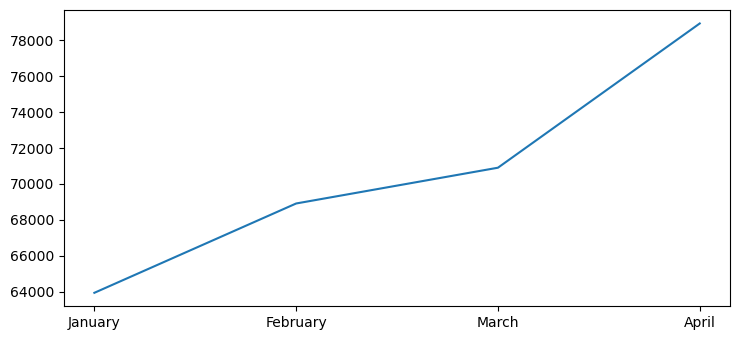

In [194]:
x = ["January", "February", "March", "April"]
y = [JAN,FEB,MAR,APR]

plt.plot(x, y)

plt.show()

## 10. The line plot shows an increased average revenue per month, with an exceptional increase from the month of March to April. The time from February to March shows a slower progress. 

In [195]:
df_group = df.groupby(['Category']).agg({'Sales_Price': ['mean']})

df_group

,Sales_Price
,mean
Category,
Clothing,51.1875
Electronics,535.0000
Home Decor,120.6250


<Axes: title={'center': 'Average Sales Price per Category'}, xlabel='Category', ylabel='Average Sales Price'>

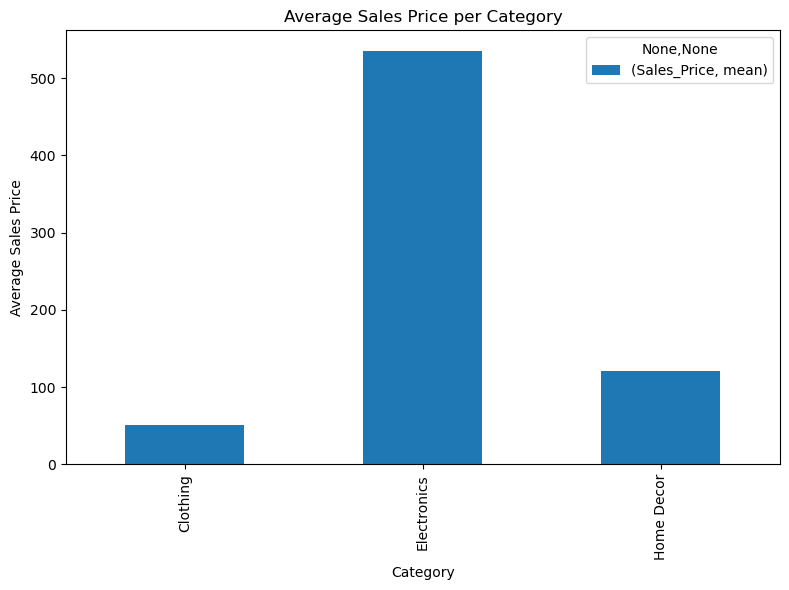

In [196]:
df_group.plot(kind='bar', title='Average Sales Price per Category',
               ylabel='Average Sales Price', xlabel='Category', figsize=(8, 6))

## 11. Electronics has an average sales price that is far higher than that of clothing and home decor

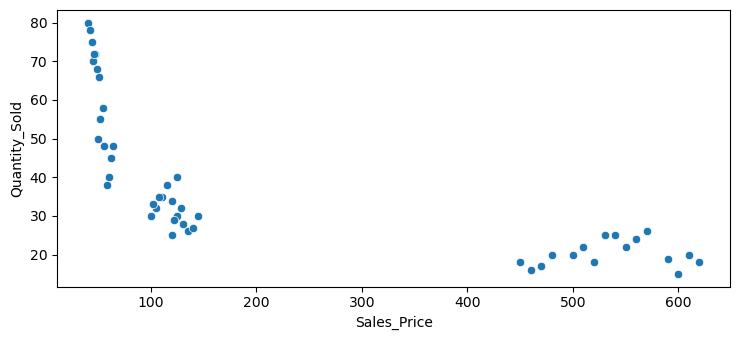

In [197]:
sns.scatterplot(x="Sales_Price", y="Quantity_Sold", data=df);

## 12. According to the correlation plot, it can be noted that the more expensive an item is, the Quantity of sold items is less. This shows an negative correlation, as the graph shows an exponential decay. 